
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns()
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

&nbsp; e) Find all rows where the freetime is NaN.   

&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

In [2]:
# a)
import pandas as pd
import os
import numpy as np
path = os.path.join(os.getcwd(),"student-mat-missing-data.csv")
data_student = pd.read_csv(path, header = 0)
data_student.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


In [3]:
# b
data_student["sex"].unique()
data_student.isnull().sum()
data_student.columns
data_student.value_counts()

Unnamed: 0  school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0           GP      F    18.0  U        GT3      A        4     4     at_home   teacher   course  mother    2           2          0         yes        no      no    no          yes      yes     no        no        4.0     3.0       4.0    1     1     3.0     6.0       5   6   6     1
1           GP      F    17.0  U        GT3      T        1     1     at_home   other     course  father    1           2          0         no         yes     no    no          no       yes     yes       no        5.0     3.0       3.0    1     1     3.0     4.0       5   5   6     1
2           GP      F    15.0  U        LE3      T        1     1     at_home   other     other   mother    1           2          3         yes   

In [4]:
#c
def nulldata_plot (dataframe):
    import seaborn as sns
    import matplotlib.pyplot as plt
    nulldata = dataframe.isnull().sum().reset_index()
    nulldata.columns = ["Column","Count"]
    nulldata = nulldata[nulldata["Count"] > 0]
    sns.barplot (data=nulldata, x="Column",y="Count",hue="Column")
    return plt.show()

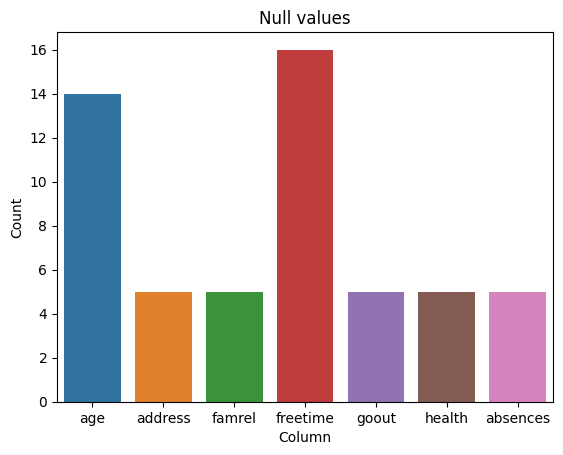

In [5]:
# d
import data_utils
data_utils.nulldata_plot(data_student)

In [6]:
# e
nan_freetime = data_student[data_student["freetime"].isnull()]
nan_freetime

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


In [7]:
# f
nan_free_or_age = data_student[data_student[["freetime","age"]].isnull().any(axis=1)]
nan_free_or_age

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [8]:
# g
constitutes_nanrow = len(data_student[data_student[["freetime","age"]].isnull().all(axis=1)])/len(data_student)
constitutes_nanrow

0.012658227848101266

---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 

&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
```

d)

```python

array(['yes', 'no'], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

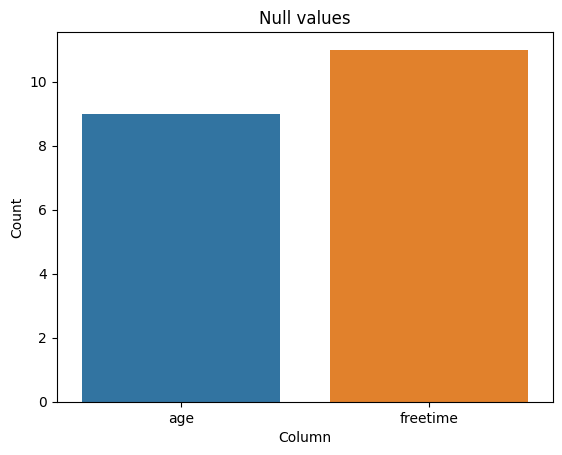

In [9]:
# a
data_clean_student = data_student.drop(data_student[data_student[["freetime","age"]].isnull().all(axis=1)].index)
data_utils.nulldata_plot(data_clean_student)


Text(0.5, 1.0, 'Histogram of age')

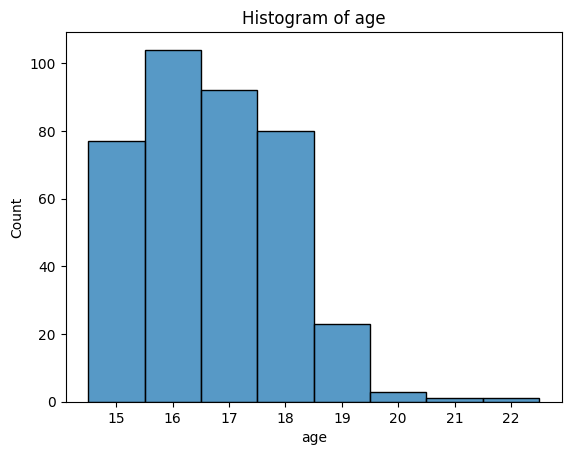

In [27]:
#b
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data= data_clean_student, x = "age", discrete=True)
plt.title( "Histogram of age")


In [30]:
#c
data_clean_student.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [37]:
#d
data_clean_student["higher"].unique()


array(['yes', 'no'], dtype=object)

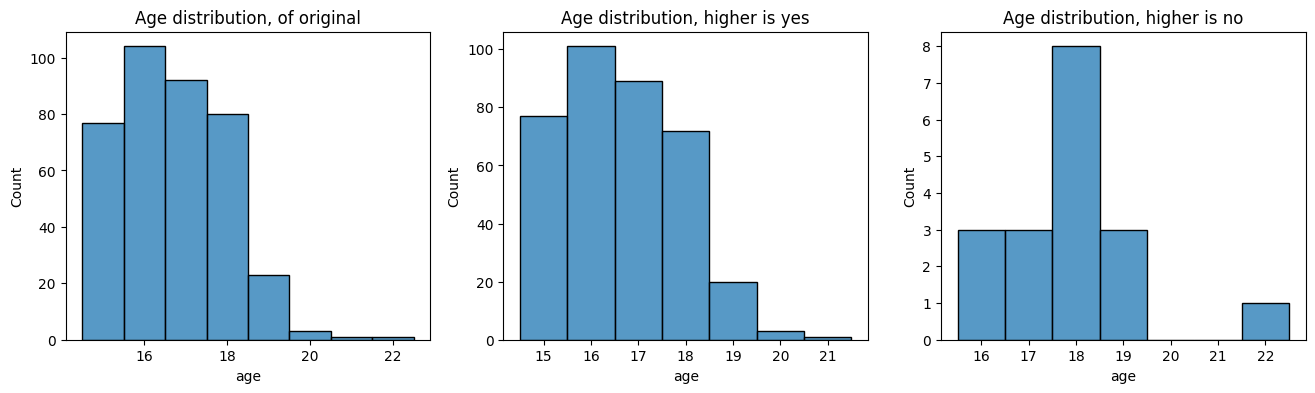

In [43]:
#e
fig, axes = plt.subplots(1,3, dpi=100, figsize = (16,4))
titles = ["Age distribution, of original","Age distribution, higher is yes", "Age distribution, higher is no"]
data_f = [data_clean_student, data_clean_student[data_clean_student["higher"]== "yes"],data_clean_student[data_clean_student["higher"]== "no"]]

for i, (data, title) in enumerate(zip(data_f,titles)):
    sns.histplot (data =data, x = "age", ax = axes[i],discrete=True)
    axes[i].set(title=title)

In [51]:
#f
data_clean_student["Alcohol"] = data_clean_student[["Dalc","Walc"]].sum(axis=1)
data_clean_student.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3


Text(0.5, 1.0, 'Alcohol consumption vs age')

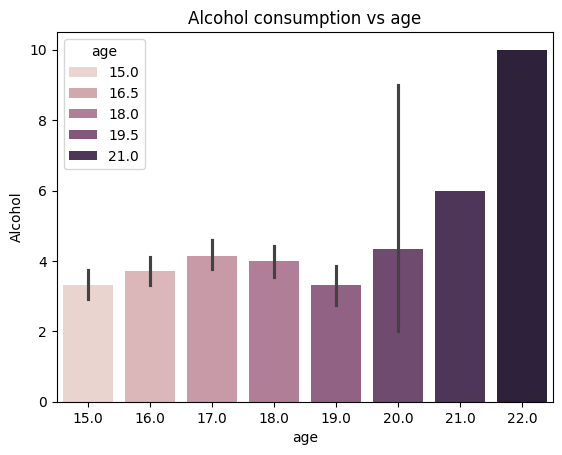

In [53]:
#g
sns.barplot(data=data_clean_student, x = "age", y = "Alcohol", hue= "age")
plt.title("Alcohol consumption vs age")

In [54]:
#h
data_clean_student.loc[data_clean_student["Alcohol"]>=4,"age"] = data_clean_student.loc[data_clean_student["Alcohol"]>=4, "age"].fillna(17)
data_clean_student.loc[data_clean_student["Alcohol"]<4,"age"] = data_clean_student.loc[data_clean_student["Alcohol"]<4, "age"].fillna(15)
data_clean_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  390 non-null    int64  
 1   school      390 non-null    object 
 2   sex         390 non-null    object 
 3   age         390 non-null    float64
 4   address     390 non-null    object 
 5   famsize     390 non-null    object 
 6   Pstatus     390 non-null    object 
 7   Medu        390 non-null    int64  
 8   Fedu        390 non-null    int64  
 9   Mjob        390 non-null    object 
 10  Fjob        390 non-null    object 
 11  reason      390 non-null    object 
 12  guardian    390 non-null    object 
 13  traveltime  390 non-null    int64  
 14  studytime   390 non-null    int64  
 15  failures    390 non-null    int64  
 16  schoolsup   390 non-null    object 
 17  famsup      390 non-null    object 
 18  paid        390 non-null    object 
 19  activities  390 non-null    object

---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---

In [3]:
import pandas as pd

tabell = pd.read_html("https://tabellen.se/fotboll/allsvenskan")
print(tabell[0].head())
print(tabell[1].head())

   #           Lag   S   V   O   F  +/-   P
0  1       Mjällby  29  22   6   1   38  72
1  2      Hammarby  29  18   5   6   28  59
2  3          GAIS  29  14  10   5   16  52
3  4           AIK  29  13   9   7    9  48
4  5  IFK Göteborg  29  15   3  11    6  48
   #          Spelare             Lag  Mål
0  1    August Priske  Djurgårdens IF   17
1  1  Ibrahim Diabate            GAIS   17
2  1     Nahir Besara        Hammarby   17
3  4        Leo Walta          Sirius   16
4  5       Max Fenger    IFK Göteborg   12


In [8]:

tabell1 = pd.read_html("https://tabellen.se/fotboll/allsvenskan",match="Mål")
tabell1

[     #            Spelare             Lag  Mål
 0    1      August Priske  Djurgårdens IF   17
 1    1    Ibrahim Diabate            GAIS   17
 2    1       Nahir Besara        Hammarby   17
 3    4          Leo Walta          Sirius   16
 4    5         Max Fenger    IFK Göteborg   12
 5    6  Christoffer Nyman  IFK Norrköping   11
 6    6         Robbie Ure          Sirius   11
 7    8      Elliot Stroud         Mjällby   10
 8    8        Victor Lind  Brommapojkarna   10
 9   10       Tokmac Nguen  Djurgårdens IF    9
 10  11      Adam Jakobsen  Brommapojkarna    8
 11  11         Johan Hove             AIK    8
 12  11         Thordarson    IFK Göteborg    8
 13  11      Tobias Heintz    IFK Göteborg    8]